In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bolt_data.csv')

In [4]:
df.head(5)

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,...,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


In [13]:
df.columns

Index(['order_id_new', 'order_try_id_new', 'calc_created', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration', 'change_reason_pricing',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'overpaid_ride_ticket', 'fraud_score'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id_new           4943 non-null   int64  
 1   order_try_id_new       4943 non-null   int64  
 2   calc_created           4943 non-null   object 
 3   metered_price          4923 non-null   float64
 4   upfront_price          3409 non-null   float64
 5   distance               4943 non-null   int64  
 6   duration               4943 non-null   int64  
 7   gps_confidence         4943 non-null   int64  
 8   entered_by             4943 non-null   object 
 9   b_state                4943 non-null   object 
 10  dest_change_number     4943 non-null   int64  
 11  prediction_price_type  4923 non-null   object 
 12  predicted_distance     4923 non-null   float64
 13  predicted_duration     4923 non-null   float64
 14  change_reason_pricing  298 non-null    object 
 15  tick

## Data exploration

In [44]:
import seaborn as sns
import numpy as np

In [27]:
# Cleaning the data a bit. I noticed there were some instances where the predicted distance and duration would be 0, I imagine this is some sort of error and probably shouldn't happen.

df_clean = df[df['predicted_distance'] > 0]
df_clean = df_clean[df_clean['predicted_duration'] > 0].reset_index()

In [29]:
df_clean.describe()

,index,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,ticket_id_new,device_token,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,fraud_score
count,4915.000000,4915.000000,4915.000000,4915.000000,3409.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,0.0,4915.000000,4915.000000,4915.000000,2181.000000
mean,2472.550763,2061.367447,2061.367040,7999.594602,4160.095747,9783.895422,1566.372940,0.800610,1.118006,8836.996948,1108.538759,2469.725534,NaN,1092.753815,0.558901,0.068362,-674.339294
std,1427.003126,1199.651496,1199.652152,15825.704331,17015.711912,10933.888166,1649.834076,0.399582,0.498177,10551.372088,805.515601,1427.221871,NaN,627.006410,0.496569,0.252392,1119.730849
min,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,-14225.000000
25%,1236.500000,1019.500000,1019.500000,5.375000,4.200000,3789.500000,604.000000,1.000000,1.000000,4141.000000,600.000000,1234.500000,NaN,561.000000,0.000000,0.000000,-826.000000
50%,2473.000000,2067.000000,2067.000000,13.340000,6.600000,7151.000000,1054.000000,1.000000,1.000000,6924.000000,942.000000,2469.000000,NaN,1088.000000,1.000000,0.000000,-279.000000
75%,3708.500000,3091.500000,3091.500000,10991.670000,4000.000000,11967.000000,1929.500000,1.000000,1.000000,10683.000000,1427.500000,3705.500000,NaN,1643.000000,1.000000,0.000000,-65.000000
max,4942.000000,4165.000000,4165.000000,194483.520000,595000.000000,233190.000000,22402.000000,1.000000,12.000000,353538.000000,20992.000000,4942.000000,NaN,2158.000000,1.000000,1.000000,49.000000


In [58]:
# I'll create 3 features here based on my assumptions
# The variation in relation to what was predicted, so variation of price (up or down), distance and duration.
# My hypothesis is that variation is what may cause the user to complain about the overcharge.


df_clean = df_clean.assign(price_variation = lambda x: (x['metered_price'] - x['upfront_price'])/x['upfront_price'] * 100)

df_clean = df_clean.assign(distance_variation = lambda x: (x['distance'] - x['predicted_distance'])/x['predicted_distance'] * 100)

df_clean = df_clean.assign(duration_variation = lambda x: (x['duration'] - x['predicted_duration'])/x['predicted_duration'] * 100)


# I create a third feature, which indicates if the person paid more than was originally planned

df_clean = df_clean.assign(paid_more = lambda x: x['metered_price'] > x['upfront_price'])




In [59]:
df_clean.head(5)

,index,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,...,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score,price_variation,distance_variation,duration_variation,paid_more
0,0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,...,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0,-59.600000,-78.788105,-35.838680,False
1,1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,...,DA.4.39,1578,Samsung SM-G965F,1,0,NaN,69.166667,149.256343,36.944444,True
2,2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,...,DA.4.37,951,Samsung SM-A530F,1,0,-166.0,23.428571,7.924896,60.508083,True
3,3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,...,DA.4.37,1587,TECNO-Y6,0,1,NaN,NaN,1548.922771,133.333333,False
4,4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,...,DA.4.37,433,Itel W5504,0,0,NaN,2.730769,-27.837876,82.397408,True


In [126]:
df_clean[df_clean['upfront_price'].isna()]['index'].count()

1506

In [131]:
# To kick it off, I would expect to see a big variation on the promised price vs metered price.

# You can see that is in fact true. Looking at just the cases where the rider paid more than was promised, there is a huge variation of 129%!!


print('The average variation is: {:0.2f}'.format(df_clean[df_clean['paid_more'] == True]['price_variation'].median()))
pd.pivot_table(df_clean[df_clean['paid_more'] == True],values='price_variation',index=['overpaid_ride_ticket'],aggfunc=np.median)
                  

The average variation is: 24.05


,price_variation
overpaid_ride_ticket,
0,23.739407
1,71.863368


<AxesSubplot:ylabel='overpaid_ride_ticket'>

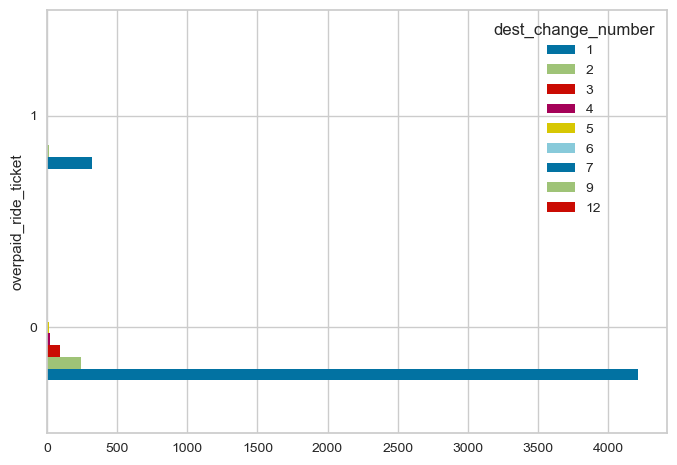

In [128]:
# There should only be two explanations for this
# (1) The rider put the wrong address and then updated it or something related to updating the address
# (2) For whatever reason we got the distance or duration poorly predicted 
# Let's check one by one

pd.pivot_table(df_clean,values='order_id_new',index=['overpaid_ride_ticket'],columns=['dest_change_number'],aggfunc='count').plot.barh()

# Most of the overpaid ride tickets were NOT due to destination change


In [129]:
pd.pivot_table(df_clean,values='order_id_new',index=['overpaid_ride_ticket'],columns=['dest_change_number'],aggfunc='count')


dest_change_number,1,2,3,4,5,6,7,9,12
overpaid_ride_ticket,,,,,,,,,
0,4212.0,242.0,88.0,20.0,11.0,2.0,2.0,1.0,1.0
1,323.0,11.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN


In [76]:
pd.pivot_table(df_clean,values='order_id_new',index=['overpaid_ride_ticket'],columns=['entered_by'],aggfunc='count')

# Most of the complains but also most of the rides, were entered by the client, so nothing out of the ordinary here 

entered_by,client,driver
overpaid_ride_ticket,,
0,4379,200
1,335,1


In [79]:
pd.pivot_table(df_clean,values='order_id_new',index=['overpaid_ride_ticket'],columns=['change_reason_pricing'],aggfunc='count')

# Most of the rides had no change, so the reason for change doesn't seem like something to dig into.

change_reason_pricing,client_destination_changed,driver_destination_changed,driver_waypoint_changed
overpaid_ride_ticket,,,
0,129.0,148.0,6.0
1,12.0,NaN,NaN


In [ ]:
# Seems like hypothesis 1 is not conclusive, even though my hunch would have said to look into it.

In [80]:
# Let's dig into option 2

# Generally, having a bad GPS signal may cause location problems, and that's what the data tells us.

pd.pivot_table(df_clean,values='order_id_new',index=['overpaid_ride_ticket'],columns=['gps_confidence'],aggfunc='count')

# When there is bad GPS data, 25% of the riders will complain, compared to 3.5% of high confidence rides.

gps_confidence,0,1
overpaid_ride_ticket,,
0,780,3799
1,200,136


In [110]:
print(df_clean['distance_variation'].median())

pd.pivot_table(df_clean,values='distance_variation',index=['overpaid_ride_ticket'],columns=['gps_confidence'],aggfunc=np.median)

#The average ride has very low distance variation but the ones with bad GPS and the overpaid ticket, which are around 60% of the tickets have a 64% variation!!


2.7954038758360484


gps_confidence,0,1
overpaid_ride_ticket,,
0,0.224259,2.933720
1,64.849232,0.126706


In [111]:
print(df_clean['duration_variation'].median())


pd.pivot_table(df_clean,values='duration_variation',index=['overpaid_ride_ticket'],columns=['gps_confidence'],aggfunc=np.median)


16.106014271151885


gps_confidence,0,1
overpaid_ride_ticket,,
0,51.023978,10.737486
1,46.225722,17.475193


In [113]:

pd.pivot_table(df_clean,values='duration_variation',columns=['gps_confidence'],aggfunc=np.median)

# It seems like low GPS confidence really impacts our predictions of duration, we're getting it wrong by a lot (48.8%)

gps_confidence,0,1
duration_variation,48.878644,11.022727


In [114]:
pd.pivot_table(df_clean,values='distance_variation',columns=['gps_confidence'],aggfunc=np.median)

# But the distance doesn't seem to be impacted as much

gps_confidence,0,1
distance_variation,3.587684,2.764776


In [102]:
pd.pivot_table(df_clean,values='price_variation',columns=['gps_confidence'],aggfunc=np.median)


gps_confidence,0,1
price_variation,30.150212,3.111111


In [95]:
# When we have bad GPS data, we have higher variation, more especifically in the duration side.
#I means we might have the right spot but for some reason the duration is longer than in the cases where we have good gpd data

In [103]:
pd.pivot_table(df_clean,values='duration_variation',index=['overpaid_ride_ticket'],aggfunc=np.median)

# It seems like the duration variation is causing a lot of problems.

,duration_variation
overpaid_ride_ticket,
0,14.691943
1,38.508772


In [104]:
pd.pivot_table(df_clean,values='distance_variation',index=['overpaid_ride_ticket'],aggfunc=np.median)


,distance_variation
overpaid_ride_ticket,
0,2.630972
1,8.468943


In [106]:
pd.pivot_table(df_clean,values='price_variation',index=['overpaid_ride_ticket'],aggfunc=np.median)


,price_variation
overpaid_ride_ticket,
0,4.145879
1,20.330224


In [133]:
df_clean['duration_variation'].median()

16.106014271151885

## Machine learning model

In [ ]:
# Essentially, there is no 100%, so we might still get things wrong. But handling that is very important to provide a good experience.
# Having some form of prediction for this might give us an edge on seeing when things might go wrong and taking action.
# I tried creating an ML model below but got very poor results so I would need more data to dig further into that.

In [107]:
# init setup
from pycaret.classification import *
s = setup(df, target = 'overpaid_ride_ticket',n_jobs=1,ignore_features = ['order_id_new','order_try_id_new','calc_created','ticket_id_new','device_token','rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name'],fix_imbalance=True)

,Description,Value
0,Session id,3262
1,Target,overpaid_ride_ticket
2,Target type,Binary
3,Original data shape,"(4916, 26)"
4,Transformed data shape,"(7887, 20)"
5,Transformed train set shape,"(6412, 20)"
6,Transformed test set shape,"(1475, 20)"
7,Ignore features,11
8,Ordinal features,1
9,Numeric features,10


In [108]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6704,0.8531,0.8723,0.1567,0.2653,0.1693,0.2748,0.2570
ada,Ada Boost Classifier,0.7783,0.8484,0.7109,0.1960,0.3062,0.2230,0.2893,0.8050
lightgbm,Light Gradient Boosting Machine,0.8855,0.8478,0.4129,0.2773,0.3300,0.2704,0.2777,0.4420
gbc,Gradient Boosting Classifier,0.8352,0.8405,0.5438,0.2223,0.3140,0.2401,0.2714,1.7260
lr,Logistic Regression,0.7457,0.8289,0.7484,0.1777,0.2868,0.1984,0.2755,0.2960
rf,Random Forest Classifier,0.8933,0.8289,0.3659,0.2858,0.3193,0.2628,0.2659,1.2160
nb,Naive Bayes,0.6321,0.8230,0.9237,0.1485,0.2557,0.1564,0.2730,0.2320
knn,K Neighbors Classifier,0.7942,0.7559,0.5703,0.1809,0.2740,0.1903,0.2337,0.3240
et,Extra Trees Classifier,0.8948,0.7546,0.3534,0.2908,0.3163,0.2606,0.2633,0.9380
dt,Decision Tree Classifier,0.8872,0.6613,0.3670,0.2650,0.3059,0.2467,0.2515,0.2680


Processing:   0%|          | 0/61 [00:00<?, ?it/s]